<a href="https://colab.research.google.com/github/LOVELYVD/BIOINFORMATICS/blob/main/BioInformatics_Part2_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

 **Install conda and rdkit**

In [122]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-12-10 14:01:46--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.4’

Miniconda3-py37_4.8 100%[===================>]  81.12M   114MB/s    in 0.7s    

2021-12-10 14:01:47 (114 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.4’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::libboost==1.73.0=h3ff78a5_11
  - defaults/linux-64::cffi==1.14.0=py37h2e261b9_0
  - defaults/linux-64::conda==4.11.0=py37h06a4308_0
  - defaults/linux-

## **Load bioactivity data**

In [123]:
import pandas as pd

In [124]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

## **Calculate Lipinski descriptors**

Lipinski rule of 5 descriptors.

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [125]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [126]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
# NumPy arange() is one of the array creation routines based on numerical ranges. It creates an instance of ndarray with evenly spaced values and returns the reference to it.
# define the interval of the values contained in an array, space between them, and their type with four parameters of arange():
# numpy.arange([start, ]stop, [step, ], dtype=None) -> numpy.ndarray
# start is the number (integer or decimal) that defines the first value in the array.
# stop is the number that defines the end of the array and isn’t included in the array.
# step is the number that defines the spacing (difference) between each two consecutive values in the array and defaults to 1.
# dtype is the type of the elements of the output array and defaults to None.step can’t be zero. Otherwise, you’ll get a ZeroDivisionError. You can’t move away anywhere from start if the increment or decrement is 0.
# You can omit step. In this case, arange() uses its default value of 1. 
# >>> np.arange(1, 10)
# array([1, 2, 3, 4, 5, 6, 7, 8, 9])
# >>> np.arange(10)  # Stop is 10, start is 0, and step is 1!
# array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# verbose : bool, default: False Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in libsvm that, if enabled, may not work properly in a multithreaded context.
# VERBOSE : This flag allows you to write regular expressions that look nicer and are more readable by allowing you to visually separate logical sections of the pattern and add comments.
# Verbose mode is an option available in many computer operating systems and programming languages that provides additional details as to what the computer is doing and what drivers and software it is loading during startup or in programming it would produce detailed output for diagnostic purposes
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
       
    return descriptors
    

 import numpy as np

a = ([1,2,3,4,5])

 b = ([2,3,4,5,6])

c = ([3,4,5,6,7])


 np.array([a, b, c])

array([[1, 2, 3, 4, 5],

       [2, 3, 4, 5, 6],

       [3, 4, 5, 6, 7]])


 np.stack([a, b, c], axis=0)

array([[1, 2, 3, 4, 5],

       [2, 3, 4, 5, 6],

       [3, 4, 5, 6, 7]])

 np.stack([a, b, c], axis=1)  # not what you want, this is only to show what is possible

array([[1, 2, 3],

       [2, 3, 4],

       [3, 4, 5],

       [4, 5, 6],

       [5, 6, 7]])

 a = np.array([[1], [2], [3]])

 b = np.array([[2], [3], [4]])

 np.vstack((a,b))

array([[1],

       [2],

       [3],

       [2],

       [3],

       [4]])

In [127]:
df_lipinski = lipinski(df.canonical_smiles)
#custom function lipinski
# smailes notation contain chemical info
# chemical info tells exact atomic details of molecules
# we use this as the input to compute molecular descriptors

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [128]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,346.736,4.22320,2.0,3.0
1,286.375,3.67440,2.0,3.0
2,272.348,3.16784,2.0,3.0
3,408.807,5.25160,2.0,3.0
4,416.733,5.42470,2.0,3.0
5,366.726,4.54500,2.0,3.0
6,393.733,4.31410,2.0,5.0
7,350.271,4.03070,2.0,3.0
8,417.626,5.71270,2.0,3.0
9,306.312,2.99920,1.0,3.0


In [129]:
df
# dat read from curated file in part1 as df DataFrame

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL4471536,CC(=O)c1c(NC(C)C)[nH]c2c(C(F)(F)F)cc(Cl)cc2c1=O,770.0,active
1,CHEMBL4472908,CC(=O)c1c(NC(C)C)[nH]c2c(C(C)C)cccc2c1=O,25000.0,inactive
2,CHEMBL4580358,CC(=O)c1c(NC(C)C)[nH]c2c(C)cc(C)cc2c1=O,25000.0,inactive
3,CHEMBL4531009,CC(C)Nc1[nH]c2c(C(F)(F)F)cc(Cl)cc2c(=O)c1C(=O)...,25000.0,inactive
4,CHEMBL4554138,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c(C(F)(F)F)cc(Cl...,150.0,active
5,CHEMBL4530008,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c(F)cc(Cl)cc2c1=O,980.0,active
6,CHEMBL4573119,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c([N+](=O)[O-])c...,1160.0,intermediate
7,CHEMBL4554248,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c(F)cc(F)cc2c1=O,1060.0,intermediate
8,CHEMBL4565616,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c(Cl)cc(Cl)c(Cl)...,290.0,active
9,CHEMBL4460922,CC(=O)c1c(N2CCCCC2)[nH]c2c(F)cc(F)cc2c1=O,25000.0,inactive


Now, let's combine the 2 DataFrame
As we need standard value and bioactivity column we are combining both dataframes.

In [130]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [131]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL4471536,CC(=O)c1c(NC(C)C)[nH]c2c(C(F)(F)F)cc(Cl)cc2c1=O,770.0,active,346.736,4.22320,2.0,3.0
1,CHEMBL4472908,CC(=O)c1c(NC(C)C)[nH]c2c(C(C)C)cccc2c1=O,25000.0,inactive,286.375,3.67440,2.0,3.0
2,CHEMBL4580358,CC(=O)c1c(NC(C)C)[nH]c2c(C)cc(C)cc2c1=O,25000.0,inactive,272.348,3.16784,2.0,3.0
3,CHEMBL4531009,CC(C)Nc1[nH]c2c(C(F)(F)F)cc(Cl)cc2c(=O)c1C(=O)...,25000.0,inactive,408.807,5.25160,2.0,3.0
4,CHEMBL4554138,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c(C(F)(F)F)cc(Cl...,150.0,active,416.733,5.42470,2.0,3.0
5,CHEMBL4530008,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c(F)cc(Cl)cc2c1=O,980.0,active,366.726,4.54500,2.0,3.0
6,CHEMBL4573119,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c([N+](=O)[O-])c...,1160.0,intermediate,393.733,4.31410,2.0,5.0
7,CHEMBL4554248,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c(F)cc(F)cc2c1=O,1060.0,intermediate,350.271,4.03070,2.0,3.0
8,CHEMBL4565616,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c(Cl)cc(Cl)c(Cl)...,290.0,active,417.626,5.71270,2.0,3.0
9,CHEMBL4460922,CC(=O)c1c(N2CCCCC2)[nH]c2c(F)cc(F)cc2c1=O,25000.0,inactive,306.312,2.99920,1.0,3.0


### **Convert IC50 to pIC50**

pIC50 is negative logarithmic value of IC50

We do so because original IC50 values  has uneven distribution of datapoints

To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [132]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [133]:
df_combined.standard_value.describe()

count       27.000000
mean      9822.629630
std      11492.143916
min         86.000000
25%        410.000000
50%       1160.000000
75%      25000.000000
max      25000.000000
Name: standard_value, dtype: float64

In [134]:
-np.log10( (10**-9)* 100000000 )
# set maximum value to 100 million. so the resulting pIC value wont be less than 1

1.0

In [135]:
-np.log10( (10**-9)* 10000000000 )
# if more than 100 million we get negative pIC value.this amkes interpretation difficult.

-1.0

In [136]:
# set custom function called norm_value to set standard pIC value
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [137]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL4471536,CC(=O)c1c(NC(C)C)[nH]c2c(C(F)(F)F)cc(Cl)cc2c1=O,active,346.736,4.22320,2.0,3.0,770.0
1,CHEMBL4472908,CC(=O)c1c(NC(C)C)[nH]c2c(C(C)C)cccc2c1=O,inactive,286.375,3.67440,2.0,3.0,25000.0
2,CHEMBL4580358,CC(=O)c1c(NC(C)C)[nH]c2c(C)cc(C)cc2c1=O,inactive,272.348,3.16784,2.0,3.0,25000.0
3,CHEMBL4531009,CC(C)Nc1[nH]c2c(C(F)(F)F)cc(Cl)cc2c(=O)c1C(=O)...,inactive,408.807,5.25160,2.0,3.0,25000.0
4,CHEMBL4554138,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c(C(F)(F)F)cc(Cl...,active,416.733,5.42470,2.0,3.0,150.0
5,CHEMBL4530008,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c(F)cc(Cl)cc2c1=O,active,366.726,4.54500,2.0,3.0,980.0
6,CHEMBL4573119,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c([N+](=O)[O-])c...,intermediate,393.733,4.31410,2.0,5.0,1160.0
7,CHEMBL4554248,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c(F)cc(F)cc2c1=O,intermediate,350.271,4.03070,2.0,3.0,1060.0
8,CHEMBL4565616,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c(Cl)cc(Cl)c(Cl)...,active,417.626,5.71270,2.0,3.0,290.0
9,CHEMBL4460922,CC(=O)c1c(N2CCCCC2)[nH]c2c(F)cc(F)cc2c1=O,inactive,306.312,2.99920,1.0,3.0,25000.0


In [138]:
df_norm.standard_value_norm.describe()

count       27.000000
mean      9822.629630
std      11492.143916
min         86.000000
25%        410.000000
50%       1160.000000
75%      25000.000000
max      25000.000000
Name: standard_value_norm, dtype: float64

In [139]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4471536,CC(=O)c1c(NC(C)C)[nH]c2c(C(F)(F)F)cc(Cl)cc2c1=O,active,346.736,4.22320,2.0,3.0,6.113509
1,CHEMBL4472908,CC(=O)c1c(NC(C)C)[nH]c2c(C(C)C)cccc2c1=O,inactive,286.375,3.67440,2.0,3.0,4.602060
2,CHEMBL4580358,CC(=O)c1c(NC(C)C)[nH]c2c(C)cc(C)cc2c1=O,inactive,272.348,3.16784,2.0,3.0,4.602060
3,CHEMBL4531009,CC(C)Nc1[nH]c2c(C(F)(F)F)cc(Cl)cc2c(=O)c1C(=O)...,inactive,408.807,5.25160,2.0,3.0,4.602060
4,CHEMBL4554138,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c(C(F)(F)F)cc(Cl...,active,416.733,5.42470,2.0,3.0,6.823909
5,CHEMBL4530008,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c(F)cc(Cl)cc2c1=O,active,366.726,4.54500,2.0,3.0,6.008774
6,CHEMBL4573119,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c([N+](=O)[O-])c...,intermediate,393.733,4.31410,2.0,5.0,5.935542
7,CHEMBL4554248,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c(F)cc(F)cc2c1=O,intermediate,350.271,4.03070,2.0,3.0,5.974694
8,CHEMBL4565616,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c(Cl)cc(Cl)c(Cl)...,active,417.626,5.71270,2.0,3.0,6.537602
9,CHEMBL4460922,CC(=O)c1c(N2CCCCC2)[nH]c2c(F)cc(F)cc2c1=O,inactive,306.312,2.99920,1.0,3.0,4.602060


In [140]:
df_final.pIC50.describe()

count    27.000000
mean      5.655245
std       0.935210
min       4.602060
25%       4.602060
50%       5.935542
75%       6.406663
max       7.065502
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [141]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4471536,CC(=O)c1c(NC(C)C)[nH]c2c(C(F)(F)F)cc(Cl)cc2c1=O,active,346.736,4.22320,2.0,3.0,6.113509
1,CHEMBL4472908,CC(=O)c1c(NC(C)C)[nH]c2c(C(C)C)cccc2c1=O,inactive,286.375,3.67440,2.0,3.0,4.602060
2,CHEMBL4580358,CC(=O)c1c(NC(C)C)[nH]c2c(C)cc(C)cc2c1=O,inactive,272.348,3.16784,2.0,3.0,4.602060
3,CHEMBL4531009,CC(C)Nc1[nH]c2c(C(F)(F)F)cc(Cl)cc2c(=O)c1C(=O)...,inactive,408.807,5.25160,2.0,3.0,4.602060
4,CHEMBL4554138,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c(C(F)(F)F)cc(Cl...,active,416.733,5.42470,2.0,3.0,6.823909
5,CHEMBL4530008,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c(F)cc(Cl)cc2c1=O,active,366.726,4.54500,2.0,3.0,6.008774
8,CHEMBL4565616,CC(=O)c1c(Nc2ccc(F)cc2F)[nH]c2c(Cl)cc(Cl)c(Cl)...,active,417.626,5.71270,2.0,3.0,6.537602
9,CHEMBL4460922,CC(=O)c1c(N2CCCCC2)[nH]c2c(F)cc(F)cc2c1=O,inactive,306.312,2.99920,1.0,3.0,4.602060
10,CHEMBL4469302,CC(=O)c1c(N2CCOCC2)[nH]c2c(F)cc(F)cc2c1=O,inactive,308.284,1.84550,1.0,4.0,4.602060
11,CHEMBL4451470,CCCCNc1[nH]c2c(F)cc(F)cc2c(=O)c1C(C)=O,inactive,294.301,3.22090,2.0,3.0,4.602060


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [142]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

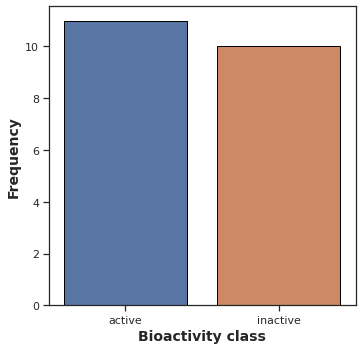

In [143]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

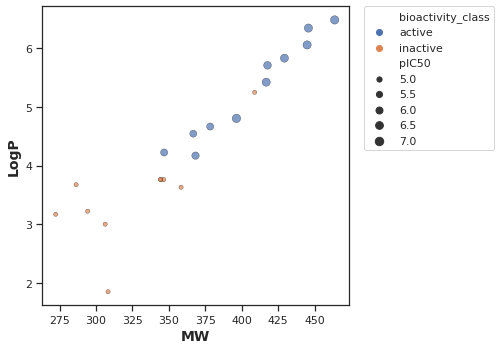

In [144]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

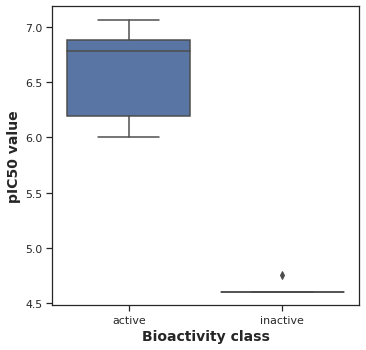

In [145]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

---

Statistical analysis is used to find check whether there is difference in active and inactive classes

Seed the generator. This method is called when RandomState is initialized. It can be called again to re-seed the generator.

np.random.seed(0) makes the random numbers predictable

With the seed reset (every time), the same set of numbers will appear every time.

If the random seed is not reset, different numbers appear with every invocation:

>>> numpy.random.rand(4)

array([ 0.42,  0.65,  0.44,  0.89])

>>> numpy.random.rand(4)

array([ 0.96,  0.38,  0.79,  0.53])

(pseudo-)random numbers work by starting with a number (the seed), multiplying it by a large number, adding an offset, then taking modulo of that sum. The resulting number is then used as the seed to generate the next "random" number. When you set the seed (every time), it does the same thing every time, giving you the same numbers.

**scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative='two-sided', axis=0, method='auto')**

Perform the Mann-Whitney U rank test on two independent samples.

The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of of difference in location between distributions.

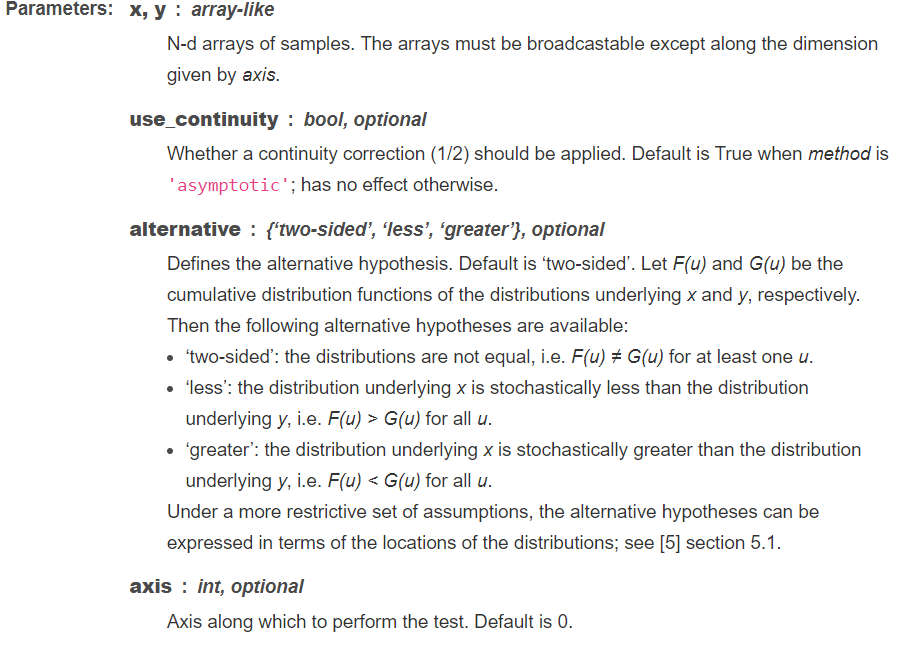

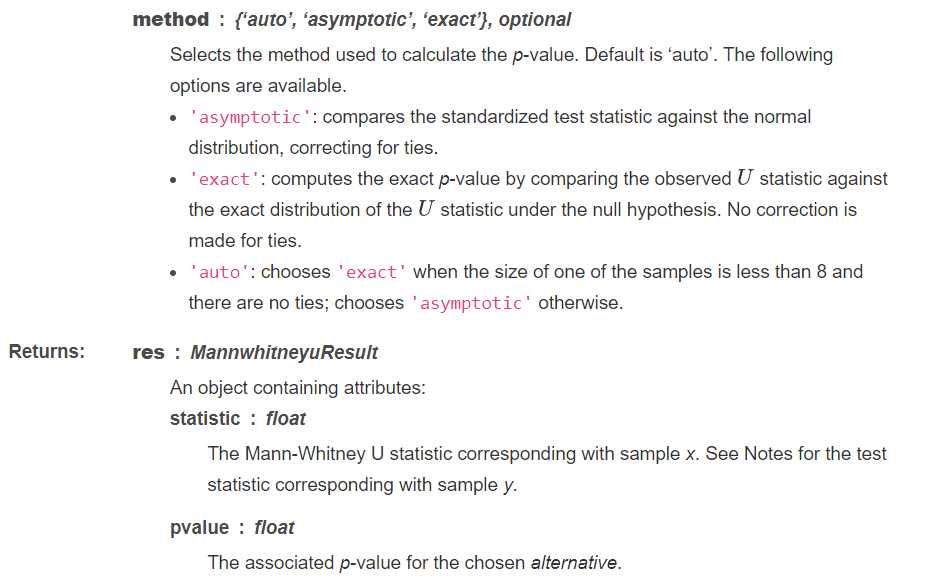

In [146]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

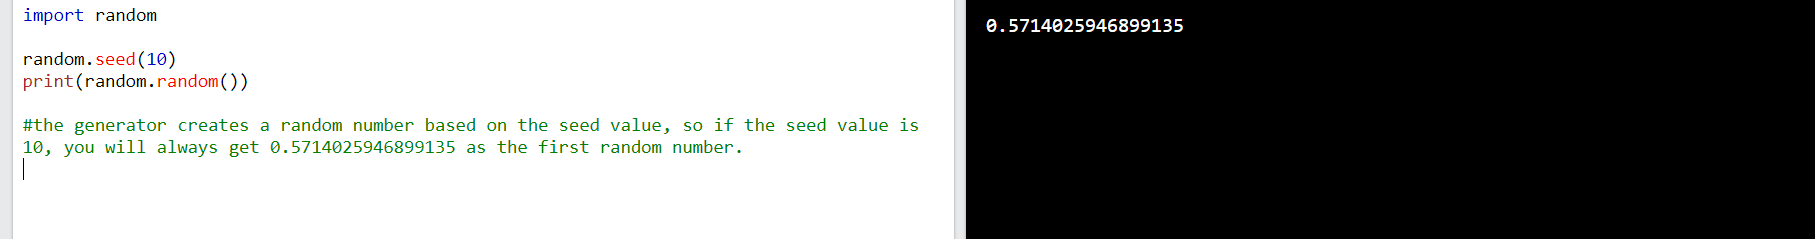

The numpy. random. randn() function creates an array of specified shape and fills it with random values as per standard normal distribution



In [147]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.000032,0.05,Different distribution (reject H0)


#### **MW**

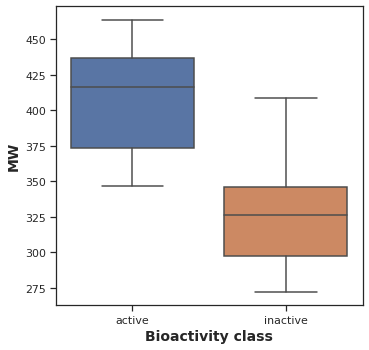

In [148]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [149]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,6.0,0.000319,0.05,Different distribution (reject H0)


#### **LogP**

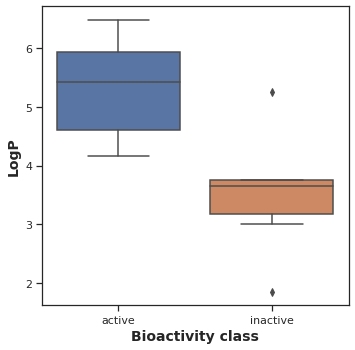

In [150]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [151]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,5.0,0.000244,0.05,Different distribution (reject H0)


#### **NumHDonors**

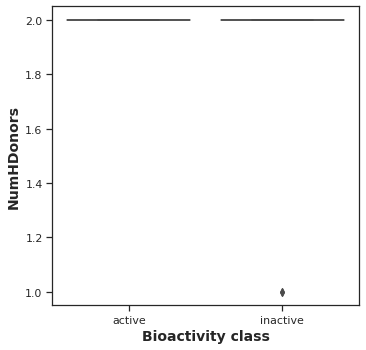

In [152]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [153]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,44.0,0.073167,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

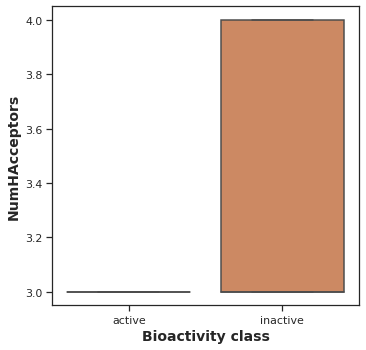

In [154]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [155]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,33.0,0.013092,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [156]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: plot_MW_vs_LogP.pdf (deflated 28%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: bioactivity_preprocessed_data.csv (deflated 77%)
  adding: plot_ic50.pdf (deflated 38%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_MW.pdf (deflated 39%)
